### Instructions
This notebook runs all the modelling and saves them as pickle files
IMPORTANT: Make sure you have pandas >= 1.5.0 in order to read in the pickle files

1. Run first cell and function definition cells

In [29]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

features_all = pd.read_csv('features_all_weeks.csv')
features_all.drop(columns = ['Unnamed: 0', 'X1', 'X1_1'], inplace = True)
display(features_all)

unclean_train_df = features_all[features_all['week'] != 8]
unclean_test_df = features_all[features_all['week'] == 8]

unclean_train_df.drop(columns = ['week'], inplace = True)
unclean_test_df.drop(columns = ['week'], inplace = True)

,playId,gameId,frameId,area_block,dist_block,dist_to_qb_block,x_force_block,y_force_block,norm_weighted_x_block,norm_weighted_y_block,...,norm_weighted_x_net,norm_weighted_y_net,hit,hurry,sack,bad_thing,week,area_net,dist_net,dist_to_qb_net
0,100,2021091205,1,79.224000,2.165379,4.273408,-231.113667,-9.797639,-219.375143,-20.861996,...,-385.976607,-11.170865,0,0,0,0,1,138.411233,1.776526,2.942182
1,100,2021091205,10,54.340933,2.090488,4.285844,-252.178533,-55.454598,-248.210286,-61.295333,...,-978.904996,-123.969607,0,0,0,0,1,133.404300,1.438919,2.081161
2,100,2021091205,11,50.359333,2.084440,4.290909,-229.912022,-58.702835,-227.877441,-63.425456,...,-762.466955,-117.010289,0,0,0,0,1,179.928667,1.416864,1.859199
3,100,2021091205,12,288.597567,2.086767,4.286241,-207.652959,-46.110483,-203.332662,-49.014753,...,-591.294678,-99.513444,0,0,0,0,1,97.210767,1.397378,1.636461
4,100,2021091205,13,160.429800,2.095862,4.283795,-188.890819,-37.290259,-183.332761,-39.309621,...,-480.375171,-75.828930,0,0,0,0,1,-23.118267,1.381174,1.412895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274524,996,2021103102,5,107.277000,2.610119,4.061498,-29.330738,-363.496787,1.390241,-368.249422,...,-405.831562,-404.989431,0,1,0,1,8,517.282800,1.409347,2.728163
274525,996,2021103102,6,53.459800,2.603108,4.061988,-41.219176,-390.488141,0.429607,-406.610204,...,-335.539260,-489.151537,0,1,0,1,8,213.855000,1.392812,2.633234
274526,996,2021103102,7,47.899800,2.584507,4.048302,-35.734822,-392.101233,15.585109,-427.785898,...,-305.543146,-550.719029,0,1,0,1,8,293.450400,1.364684,2.514553
274527,996,2021103102,8,354.631600,2.547138,4.033927,-25.571614,-374.008644,37.653782,-455.412644,...,-255.396034,-587.928020,0,1,0,1,8,-96.359800,1.348653,2.397247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274529 entries, 0 to 274528
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   playId                 274529 non-null  int64  
 1   gameId                 274529 non-null  int64  
 2   frameId                274529 non-null  int64  
 3   area_block             274529 non-null  float64
 4   dist_block             274529 non-null  float64
 5   dist_to_qb_block       274529 non-null  float64
 6   x_force_block          274529 non-null  float64
 7   y_force_block          274529 non-null  float64
 8   norm_weighted_x_block  274529 non-null  float64
 9   norm_weighted_y_block  274529 non-null  float64
 10  area_rush              274529 non-null  float64
 11  dist_rush              274529 non-null  float64
 12  dist_to_qb_rush        274529 non-null  float64
 13  x_force_rush           274529 non-null  float64
 14  y_force_rush           274529 non-nu

C:\Users\Harrison\AppData\Local\Temp\ipykernel_2540\1431358360.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unclean_train_df.drop(columns = ['week'], inplace = True)
C:\Users\Harrison\AppData\Local\Temp\ipykernel_2540\1431358360.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unclean_test_df.drop(columns = ['week'], inplace = True)


In [3]:
def get_features(df, features = 'all', response = 'bad_thing'):
    """
    Gets relevant features depending on what we want to use for modelling.
    
    Used as a helper function for df_split_by_frame function.
    There are 2 types of features: distance features and force features. 
    Force features can also be decomposed to simple forces, weighted forces, and partitioned forces
    
    Parameters
    ----------
    df: pd.DataFrame
        Feature dateframe used for training. Must be at the frame level, contain all our features, and the response
    features: str
        Represents which set of features we wish to use for our model. We can either use distance and area features, 
        simple force features, weighted force features, paritioned force features, all force features, or all features.
    response: str
        Represents what we wish our response variable column to be. Can be sack, hit, or hurry, but we use "bad_thing"
        to denote our combined response variable i.e. bad_thing = sack | hit | hurry
    
    Returns
    -------
    tuple
        First element is our features, as a pd.DataFrame, and second element as our reponse variable, as a pd.Series object
    """
    y = df[response]
    x = df.drop(columns = ['bad_thing', 'hit', 'hurry', 'sack', 'playId', 'gameId', 'frameId'])
    if features == 'all':
        return (x, y)
    elif features == 'distance':
        x = x[['area_block', 'dist_block', 'dist_to_qb_block', 'area_rush', 'dist_rush', 'dist_to_qb_rush']]
    
    elif features == 'force_simple':
        x = x[['x_force_block', 'y_force_block', 'x_force_rush', 'y_force_rush']]
    
    elif features == 'force_weighted':
        x = x[['norm_weighted_x_block', 'norm_weighted_y_block', 'norm_weighted_x_rush', 'norm_weighted_y_rush']]
    
    elif features == 'force_partitioned':
        x = x[['net_x_force_bottom', 'net_y_force_bottom', 'net_x_force_middle', 'net_y_force_middle', 
               'net_x_force_top', 'net_y_force_top']]
    elif features == 'force_all':
        x = x.drop(columns = ['area_block', 'dist_block', 'dist_to_qb_block', 'area_rush', 'dist_rush', 'dist_to_qb_rush'])
    
    return (x, y)

# keep track of frameID
def df_split_by_frame(df, group_by = 5, features = 'all'):
    """
    Helper function to get separate dataframes for each frameID. 
    
    Also keeps track of which set of features we're using to distinguish between different models
    
    Parameters
    ----------
    df: pd.DataFrame
        Our dataframe that contains our features and response
    
    group_by: int
        How often we want to take snapshots. Default is we only consider 5 frames at a time
    
    features: str
        String denoting which set of features we would like to use for training. Different arguments are specified in the
        comment above
    
    Returns
    -------
    dict
        Dictionary where the keys are the frameID, and the value is a tuple
        First element of tuple is our training data with our features, as a pd.DataFrame object
        Second element of tuple is our response variable, as a pd.Series object
        Third element is the name of the subset of features we trained on (the default is all features)
    """
    df_grouped = df.groupby('frameId')
    df_dict = dict()

    for n, df in df_grouped:
        if (n % group_by == 1 and n < 60):
            x, y = get_features(df, features)
            # display(x)
            df_dict[n] = (x, y, features)
            # df_list.append((n, x, y))
    return df_dict

In [4]:
def train_rf_model(df_dict):
    """
    Trains a random forest model on all of our features data frames
    
    Parameters
    ----------
    df_dict: dict
        Dictionary where the keys are the frameID, and the value is a tuple
        First element of tuple is our training data with our features, as a pd.DataFrame object
        Second element of tuple is our response variable, as a pd.Series object
        Third element is the name of the subset of features we trained on (the default is all features)
        
    Returns
    -------
    dict
        Dictionary where keys are frame ID and values a tuple where
        First element is the scikit learn model
        Second element is the name of the feature set that the model is trained on. Default is all features
        i.e. 'all'
    """
    models = dict()
    for (frameID, (x, y, features_str)) in df_dict.items():
        rf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=123456, max_depth = 15)
        rf.fit(x, y)
        models[frameID] = (rf, features_str)
        del rf
    pickle.dump(models, open(f"model_list_rf_{features_str}.pkl", "wb"))
    return models

def train_lr_model(df_list):
    """
    Trains a logistic regression model on all of our features data frames
    
    Parameters
    ----------
    df_dict: dict
        Dictionary where the keys are the frameID, and the value is a tuple
        First element of tuple is our training data with our features, as a pd.DataFrame object
        Second element of tuple is our response variable, as a pd.Series object
        Third element is the name of the subset of features we trained on (the default is all features)
        
    Returns
    -------
    dict
        Dictionary where keys are frame ID and values a tuple where
        First element is the scikit learn model
        Second element is the name of the feature set that the model is trained on. Default is all features
        i.e. 'all'
    """
    models = []
    for (frameID, x, y) in df_list:
        rf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=123456, max_depth = 15)
        rf.fit(x, y)
        models.append((frameID, rf))
        del rf
    return models

def evaluate(test_df_dict, models):
    """
    Evalutes models for each snapshot time given a test set.
    
    We evaluate model accuracy and recall. We also plot the ROC curves and the precision recall curves
    Note that we do the evaluation for all snapshots, typically moments in time that are equal to 1 modulo 5
    
    Parameters
    ----------
    test_df: pd.DataFrame
        Dataframe of our test set, with the features and known response values
    models: dict
        Dictionary where keys are frame ID and values a tuple where
        First element is the scikit learn model
        Second element is the name of the feature set that the model is trained on. Default is all features
        i.e. 'all'

        
    """
    for frameID, (model, _) in models.items():
        x, y, _ = test_df_dict[frameID]
        pred = model.predict(x)
        pred_prob = model.predict_proba(x)[:, 1]
        accuracy = accuracy_score(y, pred)
        recall = recall_score(y, pred)
        
        print(f'{frameID}: Out-of-bag score estimate: {model.oob_score_:.3}')
        print(f'{frameID}: Mean accuracy score: {accuracy:.3}')
        print(f'{frameID}: Recall: {recall:.3}')
        
        fpr, tpr, _ = roc_curve(y, pred_prob)

        #create ROC curve
        plt.plot(fpr,tpr)
        plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
        p, r, thresh = precision_recall_curve(y, pred_prob)
        fig, ax = plt.subplots()
        ax.plot(r, p, color='purple')

        #add axis labels to plot
        ax.set_title('Precision-Recall Curve')
        ax.set_ylabel('Precision')
        ax.set_xlabel('Recall')

        #display plot
        plt.show()
        
        


In [5]:
features = 'all'

clean_train_df_dict = df_split_by_frame(unclean_train_df, features = features)
clean_test_df_dict = df_split_by_frame(unclean_test_df, features = features)

pickle.dump(clean_test_df_dict, open(f"clean_test_dict_{features}.pkl", "wb"))

models = train_rf_model(clean_train_df_dict)
# pickle.dump(models, open("model_list_all_features.pkl", "wb"))

1
6
11
16
21
26
31
36
41
46
51
56


In [6]:
# models_force_simple = pickle.load(open("model_list_rf_force_simple.pkl", "rb"))
# clean_test_df_dict_force_simple = pickle.load(open("clean_test_dict_force_simple.pkl", "rb"))

# models_force_dist = pickle.load(open("model_list_rf_distance.pkl", "rb"))
# clean_test_df_dict_dist = pickle.load(open("clean_test_dict_distance.pkl", "rb"))

models_all = pickle.load(open("model_list_rf_all.pkl", "rb"))
clean_test_df_dict_all = pickle.load(open("clean_test_dict_all.pkl", "rb"))
# models_all = pickle.load(open("model_list_all_features.pkl", "rb"))

In [ ]:
# evaluate(clean_test_df_dict_force_simple, models_force_simple)

In [ ]:
evaluate(clean_test_df_dict_all, models_all)

In [34]:
# generate graph of predictions for specific play
def generate_graph_play(models, features, gameID, playID, frame_multiple = 5):
    
    frameID_list = []
    prob_list = []
    for frameID, (mod, _) in models.items():
        row = features[features['frameId'] == frameID]
        row = row.drop(columns = 'frameId')
        
        if len(row) == 0:
            break

        pred = mod.predict(row)
        pred_prob = mod.predict_proba(row)[:, 1]
        
        frameID_list.append(frameID)
        prob_list.append(pred_prob)
    
    # now do the plotting
    plt.plot(frameID_list, prob_list)
    
    plt.xlabel('Frame ID')
    plt.ylabel('Probability of Bad Outcome')
    plt.title(f'Predicted Probability of Bad Outcome over Time for Game {gameID} and Play {playID}')
    plt.savefig(f'predicted_prob_over_frame_{gameID}_{playID}.png')
    plt.show()

    
    

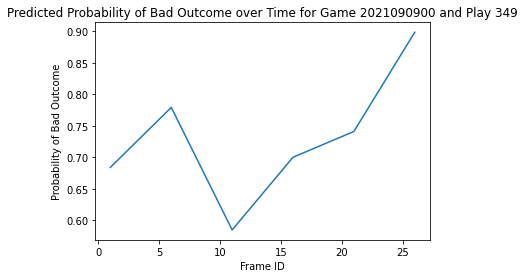

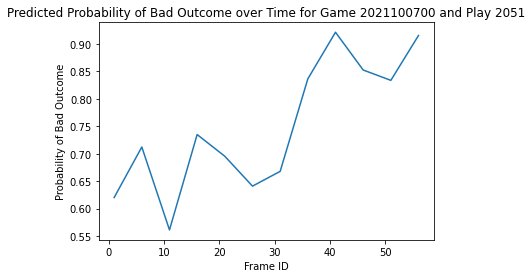

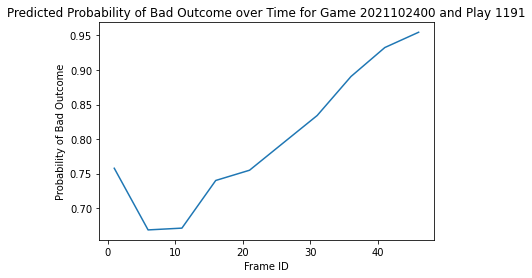

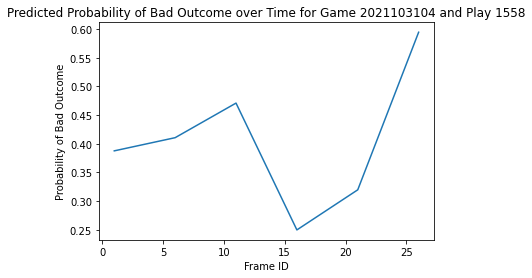

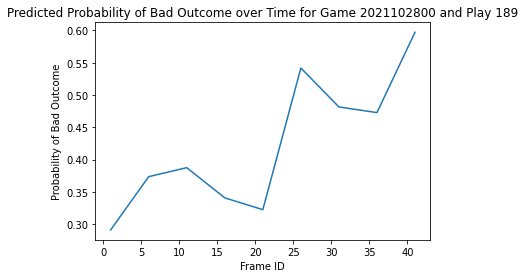

In [35]:

# generate probabiliy of bad outcome over time for specific plays
# PlayID: 189, GameID: 2021102800 (Week 8 Sack)
# PlayID: 1558, GameID: 2021103104 (Week 8 Hit)
# PlayID: 1191, GameID: 2021102400 (Week 7 Hurry)
# PlayID: 2051, GameID: 2021100700 (Week 5 Hurry and Sack)
# PlayID: 349, GameID: 2021090900 (Week 1 Hurry and Hit)

# tuple of playID, gameID for top pass rushers
play_list = [(349, 2021090900), (2051, 2021100700), (1191, 2021102400), (1558, 2021103104), (189, 2021102800)]
# input specific games here
gameID = 2021090900
playID = 349
week = 1

all_weeks = features_all.drop(columns = ['week'])
for tup in play_list:
    playID, gameID = tup
    specific_play = all_weeks[(all_weeks['playId'] == playID) & (all_weeks['gameId'] == gameID)]
    play_features = specific_play.drop(columns = ['bad_thing', 'hit', 'hurry', 'sack', 'playId', 'gameId'])
    generate_graph_play(models_all, play_features, gameID, playID)

Index(['playId', 'gameId', 'frameId', 'area_block', 'dist_block',
       'dist_to_qb_block', 'x_force_block', 'y_force_block',
       'norm_weighted_x_block', 'norm_weighted_y_block', 'area_rush',
       'dist_rush', 'dist_to_qb_rush', 'x_force_rush', 'y_force_rush',
       'norm_weighted_x_rush', 'norm_weighted_y_rush', 'net_x_force_bottom',
       'net_y_force_bottom', 'net_x_force_middle', 'net_y_force_middle',
       'net_x_force_top', 'net_y_force_top', 'net_x_force', 'net_y_force',
       'norm_weighted_x_net', 'norm_weighted_y_net', 'hit', 'hurry', 'sack',
       'bad_thing', 'area_net', 'dist_net', 'dist_to_qb_net'],
      dtype='object')


C:\Users\Harrison\AppData\Local\Temp\ipykernel_2540\1200562471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week1.drop(columns = ['week'], inplace = True)
